In [1]:
# Across-Fjord Properties Gif
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw
import cmocean

In [2]:
# Read variables from dataset
def AF_prof(datapath, case_id, time, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = (state.U.data[:, :, :, 1:] + state.U.data[:, :, :, :-1]) / 2
    Uzy = u0[time,:,:,xidx]
    
    # Potential temp
    Tzy = state.Temp.data[time,:,:,xidx] # Temp in z, t dimensions
    
    depth = state.Z.data
    dist = state.Y.data - 25500         
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szy = state.S.data[time,:,:,xidx]
    p = np.tile(pres,[len(dist),1]).T
    RhoA = gsw.rho(Szy, Tzy, p) - 1000
               
    return depth, dist, Uzy, RhoA, Tzy, Szy

In [3]:
# Run some tests
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase'
path4 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_maxhs'
#depth, dist, U1, Rho1 = AF_prof(path3, 1, -1, 178)
#state = xr.open_dataset(path3 + '/state_' + str(format(6,'03d')) + '.nc') 
#U = state.U.data
#V = state.V.data

In [ ]:
#U1.shape, Rho1.shape
U.max(), U.min(), V.max(), V.min()

In [14]:
# Making plot
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/1Sz_maxhs/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.2,0.2,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
#crho1 = np.linspace(10,15,20) # Contour range for density
crho1 = np.linspace(15,20,20) # Contour range for density
crho2 = np.linspace(15,20,10)
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal

for t in range(2,121,2):
    fig1 = plt.figure(figsize=(8,8))
    fig1.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path4, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path4, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig1.add_subplot(221)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='both')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    #CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS1 = ax1.contour(dist, depth[:22], Rho1[:22,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig1.add_axes([0.95, 0.53, 0.02, 0.34])
    cbar1 = fig1.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.2,0,0.2])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    #ax1.set_ylim(depth[8],depth[0])
    ax1.set_ylim(depth[22],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig1.add_subplot(222)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1, extend='both')
    #ax2.axhline(y=depth[8],color='k',linestyle='--')
    ax2.axhline(y=depth[22],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig1.add_subplot(223)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    CS3 = ax3.contour(dist, depth[:22], Rho1[:22,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig1.add_axes([0.95, 0.12, 0.02, 0.34])
    cbar2 = fig1.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    #ax3.set_ylim(depth[8],depth[0])
    ax3.set_ylim(depth[22],depth[0])
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig1.add_subplot(224)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    ax4.axhline(y=depth[22],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    ax4.set_xlabel('Across-fjord distance [$m$]', size=15)

    plt.close()
    day = int(t / 2)
    fig1.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig1.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')

In [8]:
depth[21]

-46.0

In [ ]:
#np.arange(10,121,10)
for m in range(10,121,10):
    print(m, end='\n ')

In [ ]:
# Making plot
caseN = 1
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/InsideFjord/AboveSill/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho = np.linspace(13,15,5)
cs = np.linspace(15,25,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig2 = plt.figure(figsize=(8,12))
    fig2.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, gf)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig2.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1)
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig2.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig2.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig2.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    #ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[8],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig2.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig2.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig2.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) S0', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig2.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[8],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig2.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig2.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig2.colorbar(im5,cax=cbaxes3, orientation='vertical')
    #cbar3.set_ticks([15, 25, 35])
    cbar3.set_ticks([15, 20, 25])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) S0', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig2.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    #ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[8],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S1', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig2.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig2.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(13,15,5)
crho2 = np.linspace(15,25,5)
cs = np.linspace(15,35,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig3 = plt.figure(figsize=(8,12))
    fig3.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, se)
    
    # Plot along-fjord velocity
    ax1 = fig3.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig3.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig3.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig3.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S2', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig3.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig3.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig3.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig3.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig3.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig3.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig3.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([15, 25, 35])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) Sc', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig3.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S2', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig3.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig3.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


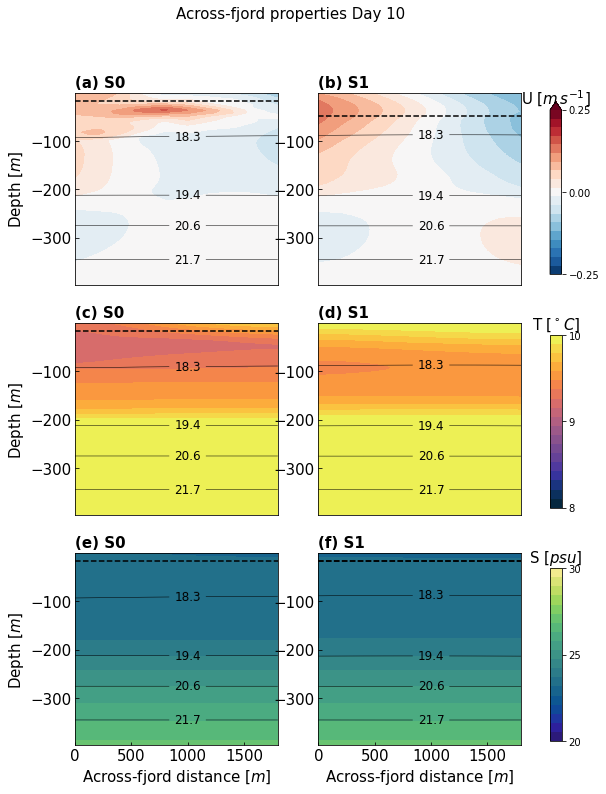

In [10]:
# Making plot for 1Sz case
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/InsideFjord/1Sz/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho = np.linspace(15,25,10)
cs = np.linspace(20,30,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(20,21):
    fig4 = plt.figure(figsize=(8,12))
    fig4.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path4, caseN, t, gf)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path4, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig4.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig4.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig4.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[-1],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig4.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=-48,color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig4.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig4.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig4.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[-1],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) S0', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig4.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    #ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig4.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth, Rho1, crho, colors='k', linewidths=.5)
    ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig4.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig4.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([20, 25, 30])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[-1],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) S0', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig4.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth, Rho2, crho, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S1', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig4.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    #plt.close()
    #fig4.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [9]:
depth[20:23]

array([-42., -46., -50.])

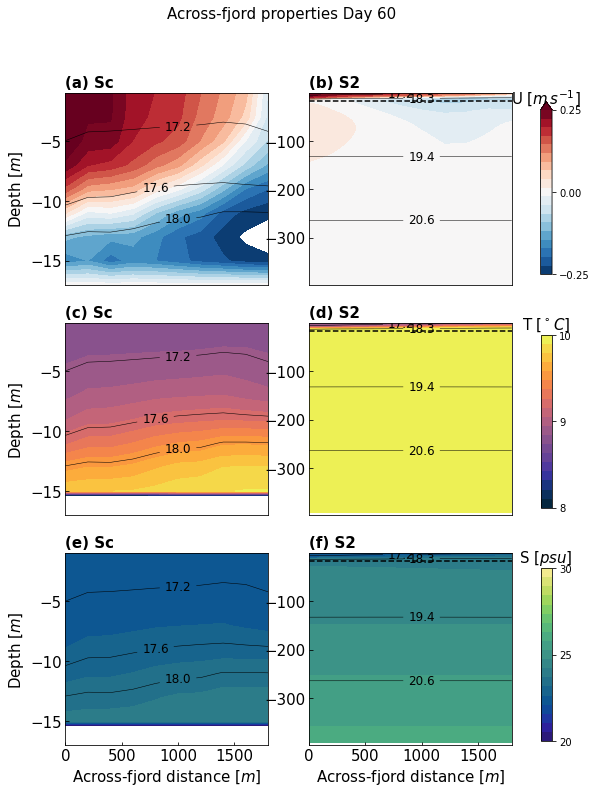

In [5]:
caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/AcrossFjord/Sill-Shelf/1Sz/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

cu = np.linspace(-0.25,0.25,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(16,18,6)
crho2 = np.linspace(15,25,10)
cs = np.linspace(20,30,20) # Contour range for Salinity
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal
cmap3 = cmocean.cm.haline

for t in range(2,121,2):
    fig5 = plt.figure(figsize=(8,12))
    fig5.tight_layout()
    
    depth, dist, U1, Rho1, T1, S1 = AF_prof(path2, caseN, t, sc)
    depth, dist, U2, Rho2, T2, S2 = AF_prof(path2, caseN, t, se)
    
    # Plot along-fjord velocity
    ax1 = fig5.add_subplot(321)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='max')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig5.add_axes([0.95, 0.67, 0.02, 0.2])
    cbar1 = fig5.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.25,0,0.25])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig5.add_subplot(322)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1)
    ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S2', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig5.add_subplot(323)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    #ax3.axhline(y=depth[8],color='k',linestyle='--')
    CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig5.add_axes([0.95, 0.4, 0.02, 0.2])
    cbar2 = fig5.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.xaxis.set_visible(False)
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    #ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig5.add_subplot(324)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.xaxis.set_visible(False)
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
    #ax4.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    # Plot salinity
    ax5 = fig5.add_subplot(325)
    im5 = ax5.contourf(dist, depth, S1, cs, cmap=cmap3)
    CS5 = ax5.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    #ax5.axhline(y=depth[8],color='k',linestyle='--')
    plt.clabel(CS5, fmt='%1.1f', fontsize=12, inline=1)
    
    cbaxes3 = fig5.add_axes([0.95, 0.13, 0.02, 0.2])
    cbar3 = fig5.colorbar(im5,cax=cbaxes3, orientation='vertical')
    cbar3.set_ticks([20, 25, 30])
    cbar3.ax.set_title('S [$psu$]', size=15)
    
    ax5.set_xlim(dist[0],dist[-1])
    ax5.set_ylim(depth[8],depth[0])
    ax5.tick_params(direction='in', labelsize=15)
    ax5.set_title('(e) Sc', loc='left', size=15, weight='bold')
    ax5.set_ylabel('Depth [$m$]', size=15)
    ax5.set_xlabel('Across-fjord distance [$m$]', size=15)
 
    
    ax6 = fig5.add_subplot(326)
    im6 = ax6.contourf(dist, depth, S2, cs, cmap=cmap3)
    ax6.axhline(y=depth[8],color='k',linestyle='--')
    CS6 = ax6.contour(dist, depth[:-2], Rho2[:-2,:], crho2, colors='k', linewidths=.5)
    plt.clabel(CS6, fmt='%1.1f', fontsize=12, inline=1)
    
    ax6.set_xlim(dist[0],dist[-1])
    ax6.set_ylim(depth[-1],depth[0])
    ax6.tick_params(direction='in', labelsize=15)
    ax6.set_title('(f) S2', loc='left', size=15, weight='bold')
    ax6.set_xlabel('Across-fjord distance [$m$]', size=15)
    
    day = int(t / 2)
    fig5.suptitle('Across-fjord properties Day ' + str(format(day,'02d')), fontsize=15)
    plt.close()
    fig5.savefig(fig_path + '/Day_' + format(day, '02d') + '.png', dpi=300, bbox_inches='tight')


In [15]:
# Generate GIF from saved output figures
import imageio
import glob

images = []
imagenames = sorted(glob.glob(fig_path + '/Day*.png'))

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + '/1Sz_maxhs-AcrossFjord_ScS2.gif', images, duration=.2)

In [ ]:
np.linspace(13,15,5)